In [1]:
!pip3 install impyute
!pip3 install datawig
#!pip3 install missingno

In [39]:
import pandas as pd 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set(style="whitegrid")

import missingno as msno # package to visualize the missing values 

import warnings 
warnings.filterwarnings('ignore')

from impyute.imputation.cs import mice
#import datawig

from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier

## Metrics
from sklearn.metrics import roc_curve,recall_score,precision_score,f1_score,auc,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv('Train_Dataset.csv')
data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [9]:
features = ["Client_Income","Credit_Amount",
            "Loan_Annuity","Client_Income_Type","Client_Education",
            "Client_Marital_Status","Client_Gender","Loan_Contract_Type",
            "Age_Days","Homephone_Tag","Workphone_Working",
            "Application_Process_Hour","Client_Permanent_Match_Tag",
            "Client_Contact_Work_Tag","Type_Organization","Default"]
data_c = data[features]
data_c.head()

,Client_Income,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Age_Days,Homephone_Tag,Workphone_Working,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
0,6750,61190.55,3416.85,Commercial,Secondary,M,Male,CL,13957,1,0,17.0,Yes,Yes,Self-employed,0
1,20250,15282,1826.55,Service,Graduation,M,Male,CL,14162,0,1,10.0,Yes,Yes,Government,0
2,18000,59527.35,2788.2,Service,Graduation dropout,W,Male,CL,16790,0,0,NaN,Yes,Yes,Self-employed,0
3,15750,53870.4,2295.45,Retired,Secondary,M,Male,CL,23195,0,0,15.0,Yes,Yes,XNA,0
4,33750,133988.4,3547.35,Commercial,Secondary,M,Female,CL,11366,0,0,NaN,Yes,Yes,Business Entity Type 3,0


In [10]:
numberic_f = ["Client_Income","Credit_Amount","Loan_Annuity","Age_Days","Application_Process_Hour"]
catgorial_f = ["Client_Income_Type","Client_Education","Client_Marital_Status","Client_Gender","Loan_Contract_Type","Homephone_Tag","Workphone_Working","Client_Permanent_Match_Tag", "Client_Contact_Work_Tag"]
target = "Default"

In [11]:
for column_name in numberic_f:
    print(column_name,data_c[data_c[column_name].apply(pd.to_numeric, errors='coerce').isna()][column_name].unique())
    

Client_Income [nan '$']
Credit_Amount [nan '$']
Loan_Annuity [nan '$' '#VALUE!']
Age_Days [nan 'x']
Application_Process_Hour [nan]


In [12]:
data_c["Client_Income"].replace("$",np.nan,inplace=True)
data_c["Credit_Amount"].replace("$",np.nan,inplace=True)
data_c["Loan_Annuity"].replace(['$','#VALUE!'],np.nan,inplace=True)
data_c["Age_Days"].replace(['x'],np.nan,inplace=True)

In [13]:
for column_name in numberic_f:
    data_c[[column_name]] =  data_c[[column_name]].apply(pd.to_numeric) 

In [14]:
%%time
imputed_training = mice(data_c[numberic_f].values)

Wall time: 3min 26s


In [146]:
imputed_training[:,3]

array([13957., 14162., 16790., ...,  9152., 10290., 14772.])

In [15]:
index = 0 
for column_name in numberic_f:
    data_c[column_name+"_Imput"] = imputed_training[:,index]
    index = index +1

data_c.head()    

,Client_Income,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Age_Days,Homephone_Tag,Workphone_Working,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default,Client_Income_Imput,Credit_Amount_Imput,Loan_Annuity_Imput,Age_Days_Imput,Application_Process_Hour_Imput
0,6750.0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,13957.0,1,0,17.0,Yes,Yes,Self-employed,0,6750.0,61190.55,3416.85,13957.0,17.000000
1,20250.0,15282.00,1826.55,Service,Graduation,M,Male,CL,14162.0,0,1,10.0,Yes,Yes,Government,0,20250.0,15282.00,1826.55,14162.0,10.000000
2,18000.0,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,16790.0,0,0,NaN,Yes,Yes,Self-employed,0,18000.0,59527.35,2788.20,16790.0,12.028698
3,15750.0,53870.40,2295.45,Retired,Secondary,M,Male,CL,23195.0,0,0,15.0,Yes,Yes,XNA,0,15750.0,53870.40,2295.45,23195.0,15.000000
4,33750.0,133988.40,3547.35,Commercial,Secondary,M,Female,CL,11366.0,0,0,NaN,Yes,Yes,Business Entity Type 3,0,33750.0,133988.40,3547.35,11366.0,12.917874


In [16]:
for column_name in catgorial_f:
    data_c[column_name] = data_c[column_name].astype("object")
    
data_c["Default"] = data_c["Default"].astype("object")    

In [17]:
#data_c.info()
for column_name in catgorial_f:
    display(data_c[column_name].value_counts())
    display(data_c[column_name].isna().sum())

Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64

3701

Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: Client_Education, dtype: int64

3645

M    87349
S    17404
D     7556
W     6074
Name: Client_Marital_Status, dtype: int64

3473

Male      78463
Female    40977
XNA           3
Name: Client_Gender, dtype: int64

2413

CL    107118
RL     11087
Name: Loan_Contract_Type, dtype: int64

3651

0    97424
1    24432
Name: Homephone_Tag, dtype: int64

0

0    87590
1    34266
Name: Workphone_Working, dtype: int64

0

Yes    112454
No       9402
Name: Client_Permanent_Match_Tag, dtype: int64

0

Yes    100015
No      21841
Name: Client_Contact_Work_Tag, dtype: int64

0

In [18]:
data_c["Client_Contact_Work_Tag_Imput"] = np.where(data_c["Client_Contact_Work_Tag"] == "Yes",1,0)
data_c["Client_Permanent_Match_Tag_Imput"] = np.where(data_c["Client_Permanent_Match_Tag"] == "Yes",1,0)

In [19]:
data_c["Loan_Contract_Type_Imput"] = data_c["Loan_Contract_Type"].fillna("Unknown")

In [20]:
data_c["Client_Gender_Imput"] =  data_c["Client_Gender"].fillna("Unknown")
data_c["Client_Gender_Imput"].replace("XNA","Female",inplace=True)

In [21]:
data_c["Client_Marital_Status_Imput"] =  data_c["Client_Marital_Status"].fillna("Unknown")

3645

[]

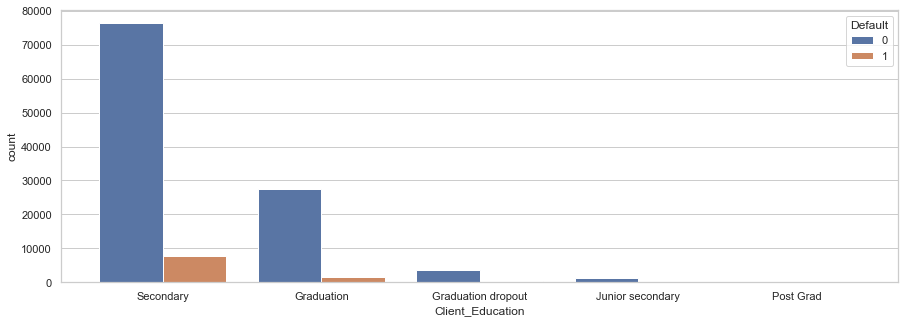

In [22]:
display(data_c["Client_Education"].isna().sum())
plt.figure(figsize=(15,5))
sns.countplot(data=data_c,x="Client_Education",hue="Default")

plt.plot()

In [23]:
data_c["Client_Education_Imput"] = data_c["Client_Education"].fillna("Other")
def map_education(x):
    if x in ["Graduation","Post Grad"]:
        return 5
    elif x in ["Graduation dropout"]:
        return 2
    elif x in ["Junior secondary"]:
        return 3
    elif x in ["Secondary"]:
        return 4
    else:
        return 1

data_c["Client_Education_Imput"]=data_c["Client_Education_Imput"].apply(map_education)

3701

[]

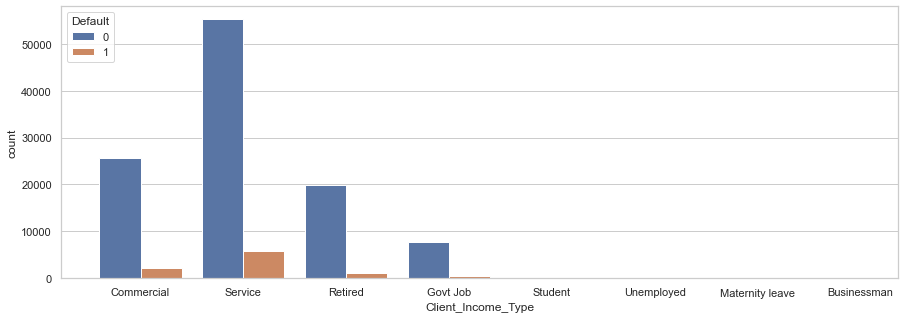

In [24]:
display(data_c["Client_Income_Type"].isna().sum())
plt.figure(figsize=(15,5))
sns.countplot(data=data_c,x="Client_Income_Type",hue="Default")

plt.plot()

In [25]:
client_income_toreplace = ["Businessman","Maternity leave","Student","Unemployed",np.nan]
data_c["Client_Income_Type_Imput"] = data_c["Client_Income_Type"].replace(client_income_toreplace,"Other")

In [26]:
for column_name in ["Client_Contact_Work_Tag_Imput","Client_Permanent_Match_Tag_Imput","Loan_Contract_Type_Imput","Client_Gender_Imput","Client_Marital_Status_Imput","Client_Education_Imput","Client_Income_Type_Imput"]:
    display(data_c[column_name].value_counts())
    display(data_c[column_name].isna().sum())

1    100015
0     21841
Name: Client_Contact_Work_Tag_Imput, dtype: int64

0

1    112454
0      9402
Name: Client_Permanent_Match_Tag_Imput, dtype: int64

0

CL         107118
RL          11087
Unknown      3651
Name: Loan_Contract_Type_Imput, dtype: int64

0

Male       78463
Female     40980
Unknown     2413
Name: Client_Gender_Imput, dtype: int64

0

M          87349
S          17404
D           7556
W           6074
Unknown     3473
Name: Client_Marital_Status_Imput, dtype: int64

0

4    83911
5    28885
2     3960
1     3645
3     1455
Name: Client_Education_Imput, dtype: int64

0

Service       61028
Commercial    27764
Retired       21043
Govt Job       8303
Other          3718
Name: Client_Income_Type_Imput, dtype: int64

0

In [32]:
ID_C =['Client_Income_Imput', 'Credit_Amount_Imput', 'Loan_Annuity_Imput',
'Age_Days_Imput', 'Application_Process_Hour_Imput',
'Client_Contact_Work_Tag_Imput', 'Client_Permanent_Match_Tag_Imput','Workphone_Working',
'Loan_Contract_Type_Imput', 'Client_Gender_Imput',
'Client_Marital_Status_Imput', 'Client_Education_Imput',
'Client_Income_Type_Imput']

TARGET = ['Default']

In [50]:
data_c[['Client_Income_Imput', 'Credit_Amount_Imput', 'Loan_Annuity_Imput',
'Age_Days_Imput', 'Application_Process_Hour_Imput',
'Client_Contact_Work_Tag_Imput', 'Client_Permanent_Match_Tag_Imput','Workphone_Working',
'Loan_Contract_Type_Imput', 'Client_Gender_Imput',
'Client_Marital_Status_Imput', 'Client_Education_Imput',
'Client_Income_Type_Imput','Default']].to_csv("Train_D_1.csv",index=False)

In [40]:
X = data_c[ID_C]
y = data_c[TARGET]
param_list = [     
    {
        "id":"RFC_PCA",
        "model":RandomForestClassifier(random_state=123),
        "grid_param":{ 
                        'model__n_estimators':[100,150,200],
                        'model__max_depth':[10,15,20,25]
                     }
    }]



def get_model(param_list):
    model_dict = dict()
    for param in param_list:      
        steps = []
        steps.append(('model',param["model"])) 
        pipeline = Pipeline(steps)
        model = GridSearchCV(pipeline, param["grid_param"],scoring='f1',cv=5,return_train_score=True,n_jobs=4)
        model_dict[param["id"]] = model
    return model_dict




for id, model in get_model(param_list).items():
    model.fit(X,y)    
    y_predict = model.predict(X_test)
    print(round(f1_score(y_test,y_predict),2))
    

ValueError: could not convert string to float: 'CL'